In [266]:
%matplotlib inline

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [268]:
X = np.array([2.0, 3.0, 3.5, 4.0, 4.5, 7.0, 7.3, 7.4, 7.5, 7.7, 8.0, 8.5])

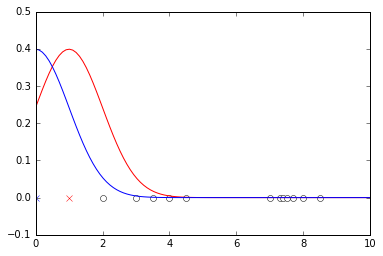

In [269]:
mu1, sigma1, p1 = 1, 1, 0.5
mu2, sigma2, p2 = 0, 1, 0.5

draw_plot([], [], (mu1, sigma1, p1), (mu2, sigma2, p2))

In [270]:
def draw_plot(x1, x2, model1, model2):
    p = plt.subplot()
    p.set_xlim([0, 10])
    p.set_ylim([-0.1, 0.5])
    if not x1 and not x2:
        p.plot(X, [0]*len(X), 'o', color='white')
    p.plot(x1, [0]*len(x1), 'o', color='red')
    p.plot(x2, [0]*len(x2), 'o', color='blue')
    
    p.plot(model1[0], [0], 'x', color='red')
    p.plot(model2[0], [0], 'x', color='blue')

    x = np.linspace(0, 10, 100)
    p.plot(x, mlab.normpdf(x, model1[0], model1[1]), color='red')
    p.plot(x, mlab.normpdf(x, model2[0], model2[1]), color='blue')
    plt.show()

In [271]:
import math
def get_prob(xi, model):
    mu, sigma, _ = model
    return 1.0/math.sqrt(2*math.pi*sigma**2) * math.exp(-((xi-mu)**2)/(2*sigma**2))

In [272]:
def M(X, model1, model2):
    # oblicza wagi
    data = []
    for xi in X:
        xi_a = get_prob(xi, model1)
        xi_b = get_prob(xi, model2)
        a_xi = xi_a * model1[2] / (xi_a * model1[2] + xi_b * model2[2])
        b_xi = 1 - xi_a
        d = (xi, a_xi, b_xi)
        data.append(d)
    return data

In [273]:
def E(data):
    # updatuje model
    mu1, mu2 = 0, 1
    sum_a, sum_b = 0, 0
    p1, p2 = 0, 0

    for xi, ai, bi in data:
        mu1 += xi * ai
        sum_a += ai

        mu2 += xi * bi
        sum_b += bi
        
    mu1 /= sum_a
    mu2 /= sum_b
    
    p2 = sum_b / len(data)
    p1 = 1 - p2
    
    sigma1, sigma2 = 0, 0
    for xi, ai, bi in data:
        sigma1 += ai * (xi - mu1)**2
        sigma2 += bi * (xi - mu2)**2
        
    sigma1 = math.sqrt(sigma1/sum_a)
    sigma2 = math.sqrt(sigma2/sum_b)
    
    return (mu1, sigma1, p1), (mu2, sigma2, p2)

In [274]:
def assign_points(X, model1, model2):
    Xa, Xb = [], []
    
    for xi in X:
        xi_a = get_prob(xi, model1)
        xi_b = get_prob(xi, model2)
        if xi_a > xi_b:
            Xa.append(xi)
        else:
            Xb.append(xi)
    return Xa, Xb

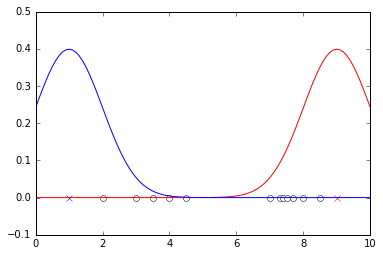

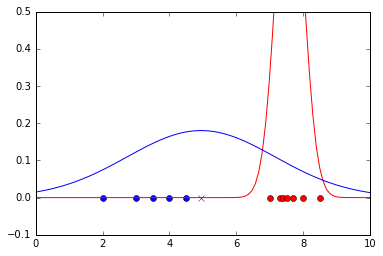

In [295]:
import random
model1 = (random.randint(0, 10), 1, 0.5)
model2 = (random.randint(0, 10), 1, 0.5)
data = []
draw_plot([], [], model1, model2)


max_change = 1
while max_change > 0.0001:
    data = M(X, model1, model2)
    new_model1, new_model2 = E(data)
    
    mu1_change = model1[0] - new_model1[0]
    sigma1_change = model1[1] - new_model1[1]    
    mu2_change = model2[0] - new_model2[0]
    sigma2_change = model2[1] - new_model2[1]
    max_change = max(mu1_change, sigma1_change, mu2_change, sigma2_change)
    
    model1, model2 = new_model1, new_model2

Xa, Xb = assign_points(X, model1, model2)
draw_plot(Xa, Xb, model1, model2)